ps: maximizing revenue for taxi drivers

dataset: https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data?resource=download

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [92]:
dff = pd.read_csv('yellow_tripdata.csv')

In [93]:
df = dff.copy()

In [94]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [95]:
df.shape

(10906858, 19)

In [96]:
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [97]:
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

In [98]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'].dt.total_seconds()/60

In [99]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0.0
1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0.0
2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0.0
3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0.0
4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0.0


In [100]:
df = df[['passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 'duration']]

In [101]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,2,1.10,2,7.5,0.0
1,5,4.90,1,18.0,0.0
2,1,10.54,1,33.0,0.0
3,1,4.75,2,16.5,0.0
4,3,1.76,2,8.0,0.0


In [102]:
df.isnull().sum()   # no missing values in the dataset!

passenger_count    0
trip_distance      0
payment_type       0
fare_amount        0
duration           0
dtype: int64

In [103]:
df.dtypes

passenger_count      int64
trip_distance      float64
payment_type         int64
fare_amount        float64
duration           float64
dtype: object

In [104]:
df = df.loc[:, ~df.columns.duplicated()]

In [105]:
df[df.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
695,1,0.90,1,7.0,8.183333
932,1,0.80,1,5.0,4.633333
1087,2,1.30,1,8.5,10.416667
1104,1,0.60,2,5.5,6.333333
1147,1,1.10,1,7.0,7.700000
...,...,...,...,...,...
10906850,1,2.50,1,9.5,8.383333
10906851,1,1.68,1,7.0,6.616667
10906852,1,2.65,1,11.0,11.950000
10906853,1,2.20,2,8.5,7.766667


In [106]:
df.drop_duplicates(inplace = True)

In [107]:
df.shape

(4494269, 5)

In [108]:
df['passenger_count'].value_counts(normalize=True)
# we need to remove rows where passenger count 0, 8, 9, 7. they contribute very less.

passenger_count
1    0.536996
2    0.188114
5    0.099397
3    0.070762
6    0.066226
4    0.038377
0    0.000112
8    0.000006
9    0.000005
7    0.000005
Name: proportion, dtype: float64

In [109]:
df['payment_type'].value_counts(normalize=True)
# take only 1 and 2 type.

payment_type
1    6.296103e-01
2    3.616960e-01
3    6.066615e-03
4    2.626901e-03
5    2.225056e-07
Name: proportion, dtype: float64

In [110]:
df = df[df['payment_type']<3]

In [111]:
df = df[(df['passenger_count']>0) & (df['passenger_count']<7)]

In [112]:
df['payment_type'] = df['payment_type'].replace([1, 2], ['Card', 'Cash'])

In [113]:
df.head()

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,2,1.10,Cash,7.5,0.0
1,5,4.90,Card,18.0,0.0
2,1,10.54,Card,33.0,0.0
3,1,4.75,Cash,16.5,0.0
4,3,1.76,Cash,8.0,0.0


In [114]:
df.describe()

,passenger_count,trip_distance,fare_amount,duration
count,4.454655e+06,4.454655e+06,4.454655e+06,4.454655e+06
mean,2.180793e+00,8.664565e+00,1.824045e+01,2.402838e+01
std,1.642383e+00,4.615098e+03,5.479051e+01,1.338902e+02
min,1.000000e+00,0.000000e+00,-2.340000e+02,-4.395000e+01
25%,1.000000e+00,1.610000e+00,9.000000e+00,1.025000e+01
50%,1.000000e+00,3.000000e+00,1.400000e+01,1.635000e+01
75%,3.000000e+00,6.000000e+00,2.250000e+01,2.446667e+01
max,6.000000e+00,8.000010e+06,1.112709e+05,1.199127e+05


In [115]:
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

<Axes: ylabel='trip_distance'>

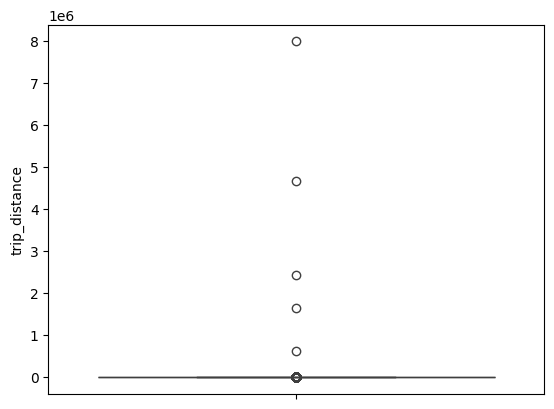

In [116]:
sns.boxplot(y = 'trip_distance', data = df)   # outliers exist!

(array([4.437731e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.00000000e-02, 1.11270940e+04, 2.22541780e+04, 3.33812620e+04,
        4.45083460e+04, 5.56354300e+04, 6.67625140e+04, 7.78895980e+04,
        8.90166820e+04, 1.00143766e+05, 1.11270850e+05]),
 <BarContainer object of 10 artists>)

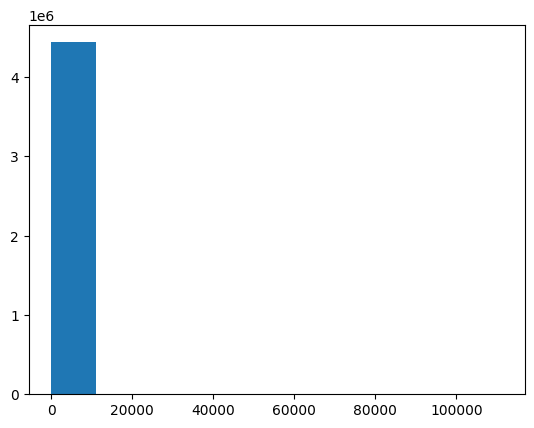

In [117]:
plt.hist(df['fare_amount'])

(array([4.437728e+06, 0.000000e+00, 1.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.00000000e-02, 8.00001009e+05, 1.60000201e+06, 2.40000301e+06,
        3.20000401e+06, 4.00000500e+06, 4.80000600e+06, 5.60000700e+06,
        6.40000800e+06, 7.20000900e+06, 8.00001000e+06]),
 <BarContainer object of 10 artists>)

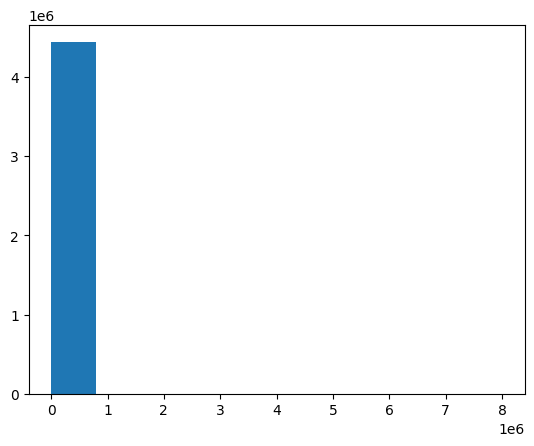

In [118]:
plt.hist(df['trip_distance'])  # outliers exist.

(array([4.43772e+06, 1.00000e+00, 2.00000e+00, 4.00000e+00, 2.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([1.66666667e-02, 1.19912850e+04, 2.39825533e+04, 3.59738217e+04,
        4.79650900e+04, 5.99563583e+04, 7.19476267e+04, 8.39388950e+04,
        9.59301633e+04, 1.07921432e+05, 1.19912700e+05]),
 <BarContainer object of 10 artists>)

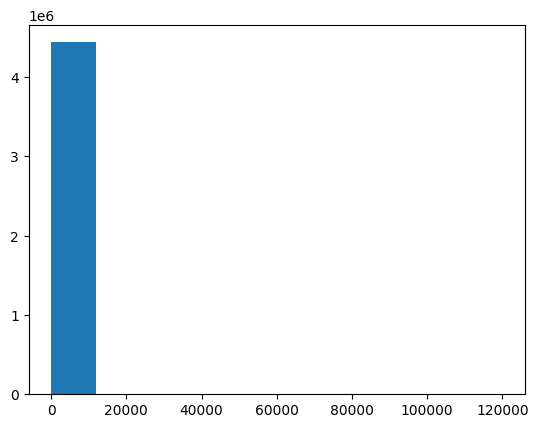

In [119]:
plt.hist(df['duration'])  # outliers exist

In [120]:
for col in ['fare_amount', 'trip_distance', 'duration']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_fence = q1-(1.5*iqr)
    upper_fence = q3+(1.5*iqr)

    df = df[(df[col]>=lower_fence) & (df[col]<=upper_fence)]

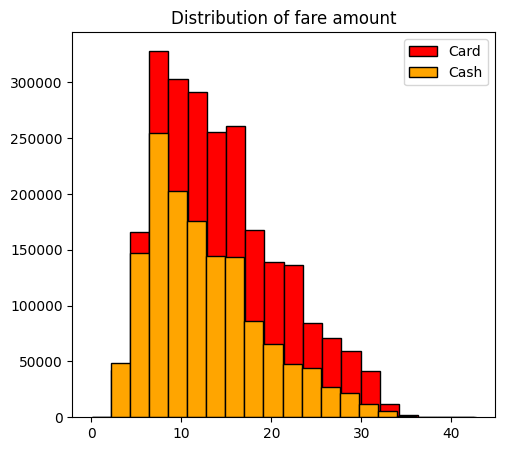

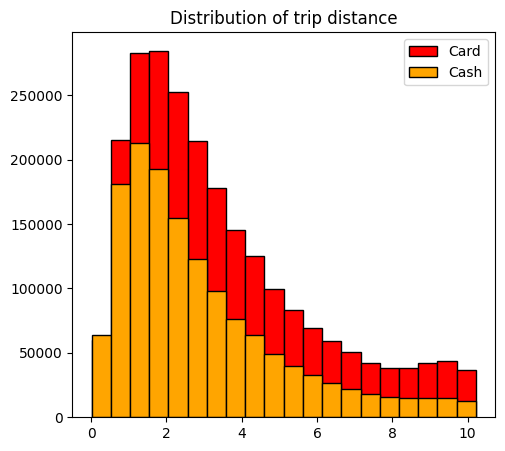

In [167]:
# any relation betn trip cost and payment type??
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Distribution of fare amount')
plt.hist(df[df['payment_type'] == 'Card']['fare_amount'], histtype='barstacked', bins = 20, color='red', edgecolor = 'black', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['fare_amount'], histtype='barstacked', bins = 20, color='orange', edgecolor = 'black', label = 'Cash')
plt.legend()
plt.show()

# card is used for larger amounts, cash for lesser amounts

# any relation betn trip dist and payment type??
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.title('Distribution of trip distance')
plt.hist(df[df['payment_type'] == 'Card']['trip_distance'], histtype='barstacked', bins = 20, color='red', edgecolor = 'black', label = 'Card')
plt.hist(df[df['payment_type'] == 'Cash']['trip_distance'], histtype='barstacked', bins = 20, color='orange', edgecolor = 'black', label = 'Cash')
plt.legend()
plt.show()

# card for longer distances, cash for shorter.

In [ ]:
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std'], 'trip_distance': ['mean', 'std']})

# card is more preferred payment mode.

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           14.381589  6.781767      3.432703  2.394966
Cash           12.713724  6.335468      2.901246  2.177774

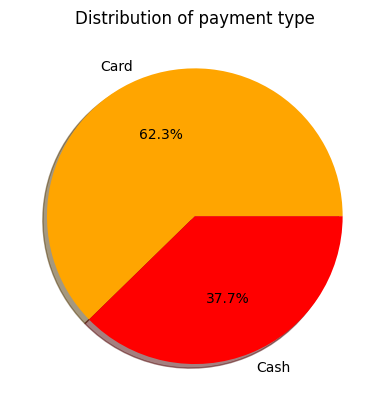

In [168]:
# how much percentage of passengers prefer card and cash
plt.title('Distribution of payment type')
plt.pie(df['payment_type'].value_counts(), labels = df['payment_type'].value_counts().index, autopct='%1.1f%%', colors=['orange', 'red'], shadow = True)
plt.show()

# 62.3% prefer card, 37.7% prefer cash.

In [ ]:
# reln betn passenger count and payment type.
passenger_count = df.groupby(['payment_type', 'passenger_count'])[['passenger_count']].count()
passenger_count

passenger_count
payment_type passenger_count                 
Card         1                        1203959
             2                         451968
             3                         177712
             4                          92857
             5                         259655
             6                         175390
Cash         1                         733976
             2                         275595
             3                         109980
             4                          64171
             5                         145865
             6                          98782

In [ ]:
passenger_count['percent'] = passenger_count['passenger_count']/passenger_count['passenger_count'].sum() * 100
passenger_count

# single passengers dominate both the payment methods. Solo riders make up the largest group overall
# small groups prefer card payment.
# smaller groups are common, larger groups are rare.
# Card users prefer traveling alone more (31.77% vs 19.37%)
# Most taxi rides are solo trips

passenger_count    percent  passenger_percent
payment_type passenger_count                                               
Card         1                        1203959  31.767483          31.767483
             2                         451968  11.925560          11.925560
             3                         177712   4.689082           4.689082
             4                          92857   2.450111           2.450111
             5                         259655   6.851218           6.851218
             6                         175390   4.627814           4.627814
Cash         1                         733976  19.366581          19.366581
             2                         275595   7.271809           7.271809
             3                         109980   2.901916           2.901916
             4                          64171   1.693206           1.693206
             5                         145865   3.848772           3.848772
             6                          98782   2.606447           2.606447

hypothesis testing

null hypothesis: there is no difference in the average fare of customers who use card and cash
alternative hypothesis: there is a difference in the average fare of customers who use card and cash

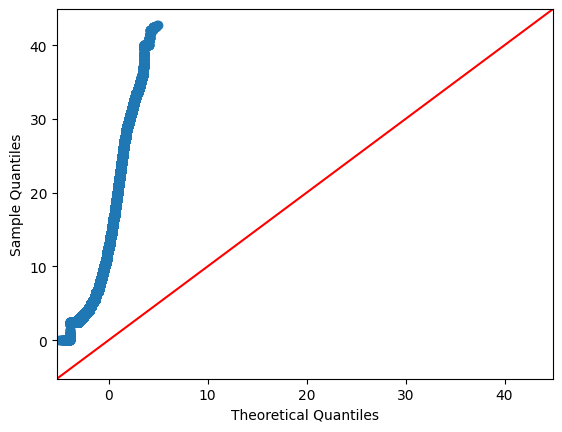

In [ ]:
# find which test to use.
# make qq plot to check if the data is normally distributed. if aligned to diagonal-->normally distributed.
import statsmodels.api as sm
sm.qqplot(df['fare_amount'], line='45')
plt.show()

# not normally distributed.
# cant use z test bcoz we dont have population std dev, we dropped some rows, also not normally distributed. so we can use t-test

In [ ]:
card_sample = df[df['payment_type'] == 'Card']['fare_amount']
cash_sample = df[df['payment_type'] == 'Cash']['fare_amount']
# alpha = 0.05

In [166]:
t_stats, p_val = stats.ttest_ind(card_sample, cash_sample, equal_var=False)
print('T statistic: ', t_stats, 'p value: ', p_val)

T statistic:  241.80525008827547 p value:  0.0


since p_val<significance value (0.05), we reject the null hypothesis. 
accept alternate hypothesis.
there is a difference in the average fare of customers who use card and cash

In [170]:
df.to_csv("final_taxi_data.csv", index=False)

to maximise revenue for taxi drivers:
- card mode of payment is beneficial.
- encourage customers to pay using credit cards.
- implement strategies such as offer discounts or cashbacks on credit cards.
- card is preferred for longer distances and higher fare amounts, further helping increase the revenue, so readily accepting such rides is beneficial for taxi drivers.
- provide secure credit card payment options.
